In [29]:
################## (Q01)

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
import numpy as np



mobile = pd.read_csv('Mobile_Dataset.csv')



                

In [2]:
mobile[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]=mobile[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]=mobile[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]].replace(0,np.NAN)

In [3]:
print(mobile.isnull().sum())

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc               474
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64


In [4]:
mobile.fillna(mobile.mean(),inplace=True)

In [5]:
print(mobile.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
labelencoder = LabelEncoder()

In [8]:
dataTransform = mobile.copy()

In [9]:
for data in mobile:
    dataTransform[data]=labelencoder.fit_transform(mobile[data])
    
    

In [10]:
dataTransform

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,255,0,17,0,0,0,5,5,108,1,...,17,186,963,4,7,17,0,0,1,1
1,382,1,0,1,5,1,51,6,56,2,...,738,1099,998,12,2,5,1,1,0,2
2,48,1,0,1,1,1,39,8,65,4,...,962,901,984,6,1,7,1,1,0,2
3,88,1,20,0,5,0,8,7,51,5,...,935,954,1055,11,8,9,1,0,0,2
4,954,1,7,0,13,1,42,5,61,1,...,928,517,499,3,1,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,5,1,0,7,26,5,...,939,1022,180,8,3,17,1,1,0,0
1996,1064,1,21,1,5,0,37,1,107,3,...,745,1080,732,6,10,14,1,1,1,2
1997,1027,0,4,1,0,1,34,6,28,7,...,716,834,1158,4,0,3,1,1,0,3
1998,732,0,4,0,3,1,44,0,65,4,...,282,120,266,13,10,17,1,1,1,0


In [11]:
sum(mobile.isnull().sum())
df = pd.DataFrame(mobile)


X = dataTransform.drop(['price_range'],axis=1)
Y = dataTransform['price_range']

In [12]:
mobile_feature_list = list(X.columns)

In [13]:
mobile_feature_list

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=41)

In [16]:
Y_test

751     1
1545    2
881     2
396     3
509     2
       ..
1518    3
1398    0
1091    2
1390    2
783     0
Name: price_range, Length: 400, dtype: int64

In [17]:
X_train.shape

(1600, 20)

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, Y_train)
  
# Predict on dataset which model has not seen before

prediction_y =knn.predict(X_test)
print(prediction_y)

[1 2 2 2 2 3 1 2 0 0 2 2 3 0 1 3 1 2 2 3 2 3 0 0 1 0 0 0 0 1 3 2 0 2 1 2 1
 1 0 0 1 2 1 2 3 1 3 2 1 0 2 2 2 2 2 1 3 3 3 1 0 3 2 0 2 3 1 1 0 1 1 0 2 0
 2 3 0 3 1 2 3 3 0 3 2 0 3 2 0 2 3 1 3 0 1 0 3 3 0 2 2 3 0 1 0 2 1 0 1 2 2
 0 2 3 3 0 0 1 3 3 2 3 0 2 2 2 1 1 0 2 2 3 2 0 3 2 3 0 1 2 1 1 1 0 0 2 0 1
 1 1 2 3 1 0 2 3 1 3 2 1 0 0 0 2 3 1 0 1 3 3 1 2 2 3 2 3 2 0 2 3 3 1 3 3 3
 2 0 2 0 0 0 0 2 3 2 2 3 3 1 1 1 2 1 2 1 1 1 1 0 0 1 1 2 0 3 2 3 3 0 1 0 1
 0 3 3 3 2 0 2 1 0 2 1 1 3 1 1 1 3 1 0 2 3 2 2 0 0 3 2 1 2 2 1 1 2 1 0 3 2
 3 3 0 0 1 0 3 0 2 1 3 1 2 2 1 0 2 0 1 1 2 3 0 0 3 3 1 2 3 3 1 1 0 1 3 2 0
 2 1 2 1 2 0 3 2 3 3 1 2 1 3 2 2 0 2 0 3 0 3 3 0 1 0 1 2 0 3 0 3 2 3 2 1 1
 3 3 1 1 0 2 3 2 1 3 0 3 1 0 3 1 0 2 0 2 2 3 3 0 2 2 2 2 1 2 1 3 1 2 0 2 3
 3 1 0 0 0 0 3 3 1 3 3 3 0 2 1 3 1 2 3 2 3 0 0 2 3 3 0 2 2 0]


In [21]:
experiment_accuracy = sm.accuracy_score(Y_test,prediction_y)
print('Accuracy Score is : ',str(experiment_accuracy))

Accuracy Score is :  0.92


In [22]:
from sklearn import metrics

In [23]:
print("Classification report :" , metrics.classification_report(prediction_y,Y_test,target_names=['0',
 '1',
 '2',
 '3']))

Classification report :                precision    recall  f1-score   support

battery_power       0.97      0.98      0.97        95
         blue       0.89      0.93      0.91        95
  clock_speed       0.92      0.83      0.87       110
     dual_sim       0.91      0.96      0.93       100

     accuracy                           0.92       400
    macro avg       0.92      0.92      0.92       400
 weighted avg       0.92      0.92      0.92       400



In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
import seaborn as sb

In [26]:
sb.set()

In [27]:
get_ipython().run_line_magic('matplotlib','inline')

In [28]:
import matplotlib.pyplot as pt

In [29]:
confusionmt = confusion_matrix(Y_test,prediction_y)

<AxesSubplot:>

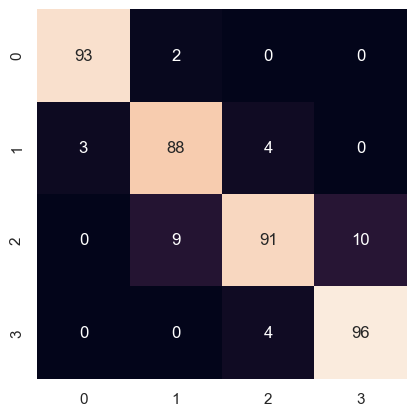

In [30]:
sb.heatmap(confusionmt.T,square=True,annot=True,fmt='d',cbar=False)

In [31]:
################## (Q02)

In [54]:
# Data Preproccessing
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra

In [55]:
# df = pd.read_csv('housepricedata.csv')
df = pd.read_csv('Mobile_Dataset.csv')

In [56]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [57]:
dataset = df.values

In [58]:
dataset

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [59]:
X = dataset[:,0:20]

In [60]:
Y = dataset[:,20]

In [61]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [62]:
X_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [63]:
Y = df['price_range']

In [64]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [65]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2 , random_state=42)

In [66]:
X_val_and_test

array([[0.76486306, 0.        , 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.45490982, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98263193, 0.        , 0.96      , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.36272545, 0.        , 0.52      , ..., 1.        , 1.        ,
        1.        ],
       [0.15163661, 0.        , 0.88      , ..., 1.        , 1.        ,
        1.        ],
       [0.45691383, 0.        , 0.56      , ..., 1.        , 1.        ,
        1.        ]])

In [67]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [68]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model = Sequential([
 Dense(16, activation="relu", input_shape=(20,)),
 Dense(16,activation='relu'),
 Dense(4,activation='softmax')
])
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics="accuracy")

In [70]:
model.fit(X_train,Y_train,validation_data=(X_val, Y_val),epochs=50)

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 1.4144 - accuracy: 0.2738 - val_loss: 1.3764 - val_accuracy: 0.2650
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3305 - accuracy: 0.3363 - val_loss: 1.3172 - val_accuracy: 0.3500
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.2758 - accuracy: 0.4350 - val_loss: 1.2544 - val_accuracy: 0.4300
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 1.1994 - accuracy: 0.5169 - val_loss: 1.1575 - val_accuracy: 0.5350
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 1.1032 - accuracy: 0.5931 - val_loss: 1.0359 - val_accuracy: 0.6050
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.9861 - accuracy: 0.6406 - val_loss: 0.8972 - val_accuracy: 0.6850
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.8589 - accuracy: 0.6900 - val_loss: 0.7794 - val_accuracy: 0.7400
Epoch 8/50
50/50 [==

In [71]:
X_train.shape

(1600, 20)

In [72]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9550


[0.15364979207515717, 0.9549999833106995]

In [50]:
 #testing our cross val sets
preds_test = model.predict(X_test)      
test_preds = predictionrelease(preds_test)

10/10 [==============================] - 0s 1ms/step


In [51]:
from sklearn.metrics import classification_report,confusion_matrix
#cross validation
print(classification_report(Y_test,test_preds)) 


              precision    recall  f1-score   support

           0       0.96      0.95      0.96        81
           1       0.89      0.94      0.91        67
           2       0.98      0.84      0.90        73
           3       0.91      1.00      0.95        79

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



In [ ]:
########################### compare 

In [52]:
import matplotlib.pyplot as plt

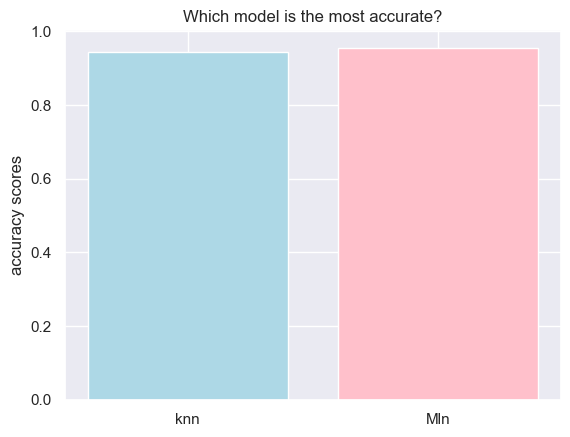

In [73]:
models = ['knn','Mln']
acc_scores = [0.9425, 0.9550]

plt.bar(models, acc_scores, color=['lightblue', 'pink'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()